In [1]:
import os
import sys
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.decomposition import PCA
import seaborn as sns
import datetime
from scipy.stats import sem
import matplotlib.cm as cm
import pathlib
import traceback
import gc
import configs

# Arguments

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'
pickles_dir = f'{engram_dir}pickles/'
bg_types = ['pinkNoise', 'AudScene', 'Babble8Spkr']
snr_types = [-9.0, -6.0, -3.0, 0.0, 3.0]

# Helper Functions

In [16]:
def plot_r2(netnames, title='', r2_hue='snr'):
    noisy_df = []
    clean_df = []
    for netname in netnames:
        with open(f'{pickles_dir}{netname}_reconstruction_r2.p', 'rb') as f:
            _noisy_df = pd.DataFrame(pickle.load(f))
        with open(f'{pickles_dir}{netname}_reconstruction_r2_clean.p', 'rb') as f:
            _clean_df = pd.DataFrame(pickle.load(f))
        noisy_df.append(_noisy_df)
        clean_df.append(_clean_df)

    noisy_df = pd.concat(noisy_df, ignore_index=True, axis=0)
    clean_df = pd.concat(clean_df, ignore_index=True, axis=0)

    fig, ax = plt.subplots(figsize=(6.4*0.8, 4.8*0.9))
    sns.lineplot(x='layer', y='score', hue=r2_hue, data=noisy_df, ax=ax)
    sns.lineplot(x='layer', y='score', color='black', linestyle='--', data=clean_df, ax=ax)
    ax.set_ylim(0,1)
    plt.title(title)
    plt.ylabel('$r^2$ of Reconstruction')
    plt.xlabel('Layer')
    plt.tight_layout()
    plt.show()
    print(np.mean(noisy_df[noisy_df['snr']==-9.0]['score']) - np.mean(clean_df['score']))
    print(np.mean(noisy_df[noisy_df['snr']==-9.0]['score']))

# Plotting

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


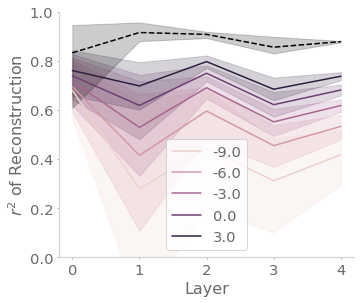

-0.45183158041569227
0.42656266854697034


In [14]:
netnames = ['pnet', 'pnet2', 'pnet3']
plot_r2(netnames)

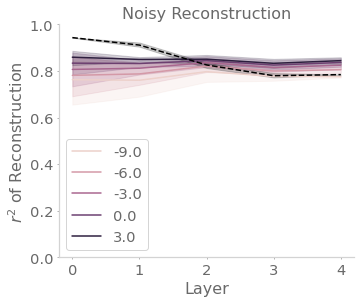

-0.07439567198576214
0.7743649890221381


In [17]:
netnames = ['pnet_noisy', 'pnet_noisy2', 'pnet_noisy3']
plot_r2(netnames, 'Noisy Reconstruction')

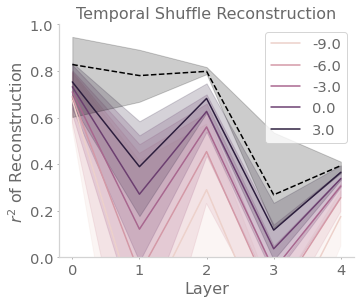

-0.5208992254848331
0.0926397018821941


In [18]:
netnames = ['pnet_temp_shuffle', 'pnet_temp_shuffle2', 'pnet_temp_shuffle3']
plot_r2(netnames, 'Temporal Shuffle Reconstruction')

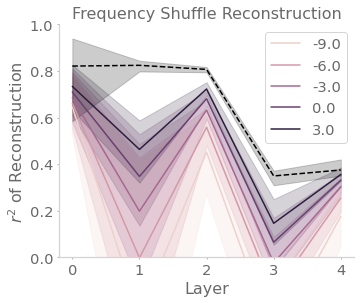

-0.4998786214466078
0.13528875858517508


In [19]:
netnames = ['pnet_freq_shuffle', 'pnet_freq_shuffle2', 'pnet_freq_shuffle3']
plot_r2(netnames, 'Frequency Shuffle Reconstruction')

# By background noise

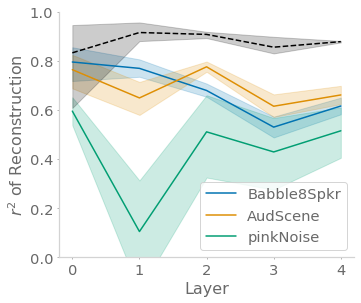

-0.45183158041569227
0.42656266854697034


In [20]:
netnames = ['pnet', 'pnet2', 'pnet3']
plot_r2(netnames, r2_hue='bg')

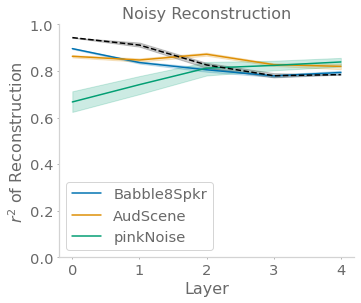

-0.07439567198576214
0.7743649890221381


In [21]:
netnames = ['pnet_noisy', 'pnet_noisy2', 'pnet_noisy3']
plot_r2(netnames, title='Noisy Reconstruction', r2_hue='bg')

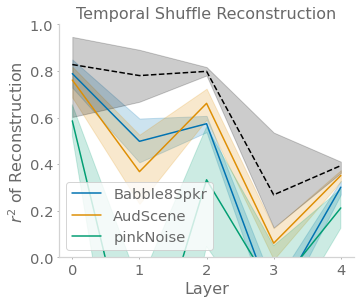

-0.5208992254848331
0.0926397018821941


In [22]:
netnames = ['pnet_temp_shuffle', 'pnet_temp_shuffle2', 'pnet_temp_shuffle3']
plot_r2(netnames, title='Temporal Shuffle Reconstruction', r2_hue='bg')

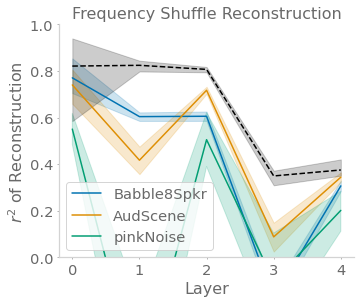

-0.4998786214466078
0.13528875858517508


In [23]:
netnames = ['pnet_freq_shuffle', 'pnet_freq_shuffle2', 'pnet_freq_shuffle3']
plot_r2(netnames, title='Frequency Shuffle Reconstruction', r2_hue='bg')